In [125]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import statsmodels as st

In [126]:
dd=pd.read_csv(r'F:\VIRU\New folder\france.csv')

In [127]:
dd.head()

,months,sales
0,2014-01,13
1,2014-02,20
2,2014-03,25
3,2014-04,18
4,2014-05,43


In [128]:
dd.tail()

,months,sales
79,2020-08,269
80,2020-09,1267
81,2020-10,107
82,2020-11,537
83,2020-12,1034


In [129]:
dd['months']=pd.to_datetime(dd['months'])

In [130]:
dd.set_index('months',inplace=True)

<AxesSubplot:xlabel='months'>

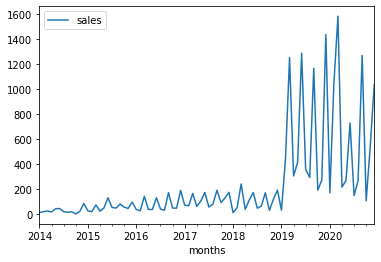

In [131]:
dd.plot()

In [132]:
import statsmodels.api as sm

In [133]:

from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot

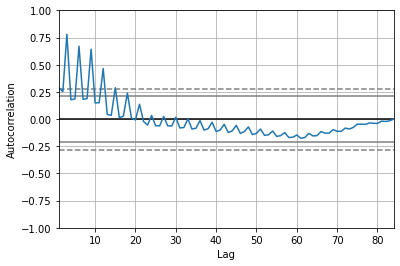

In [134]:
autocorrelation_plot(dd['sales'])
pyplot.show()

In [135]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

c:\users\personal\appdata\local\programs\python\python38\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


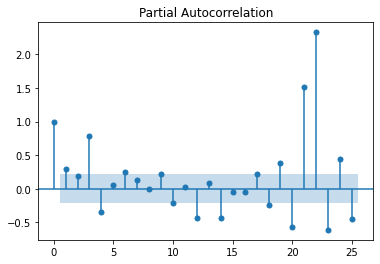

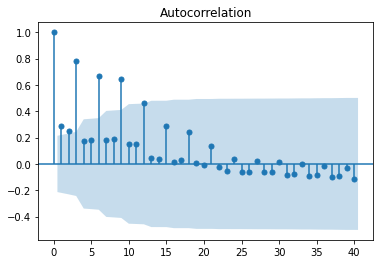

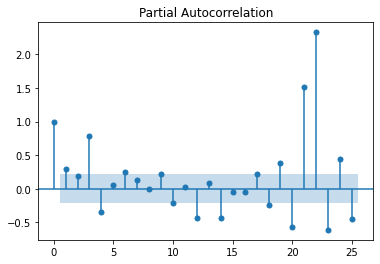

In [136]:
plot_acf(dd['sales'],lags=40)
plot_pacf(dd['sales'],lags=25)

In [137]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

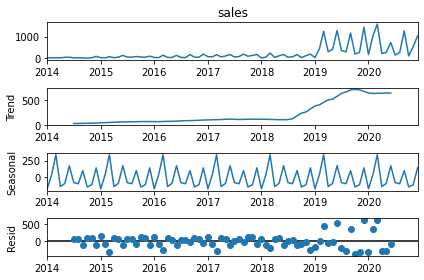

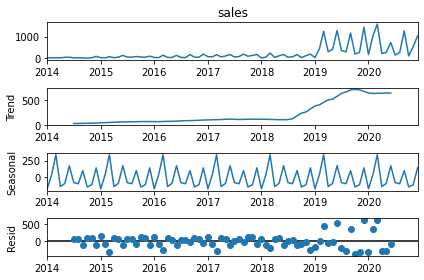

In [138]:
import statsmodels
decompose= statsmodels.tsa.seasonal.seasonal_decompose(dd['sales'])
decompose.plot()

In [139]:
model = ARIMA(dd['sales'],order=(4,0,0))
result=model.fit()

c:\users\personal\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\personal\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No

In [140]:
dd['forecast']=result.predict(start=74,end=84,dynamic=True)

<AxesSubplot:xlabel='months'>

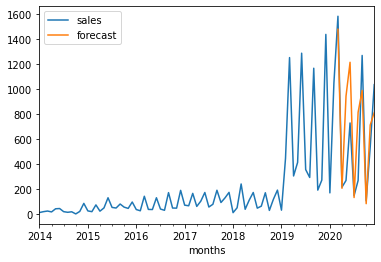

In [141]:
dd[['sales','forecast']].plot()

In [142]:
import statsmodels.api as sm


In [171]:
models = sm.tsa.statespace.SARIMAX(dd['sales'],order=(3,0,0),seasonal_order=(1,0,0,4))
results=models.fit()

c:\users\personal\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\personal\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [172]:
dd['forecast']=results.predict(start=74,end=84,dynamic=True)

<AxesSubplot:xlabel='months'>

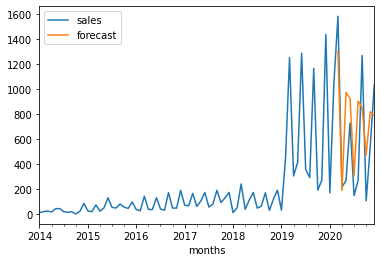

In [173]:
dd[['sales','forecast']].plot()

In [155]:
from statsmodels.tsa.stattools import adfuller

In [156]:
dfuler = adfuller(dd['sales'])

In [114]:
dfuler
#p value <0.05 indicates stationary
#p value >0.05 indicates non stationary

(-0.9593787636974177,
 0.7677902681475961,
 5,
 78,
 {'1%': -3.517113604831504,
  '5%': -2.8993754262546574,
  '10%': -2.5869547797501644},
 966.0569389340466)

In [174]:
output=results.forecast(24)

In [175]:
output

2021-01-01     24.758735
2021-02-01    533.621169
2021-03-01    811.404877
2021-04-01    162.846908
2021-05-01    550.280544
2021-06-01    706.681321
2021-07-01    271.362147
2021-08-01    496.077014
2021-09-01    616.532734
2021-10-01    322.484341
2021-11-01    452.321250
2021-12-01    566.471509
2022-01-01    356.423943
2022-02-01    427.194887
2022-03-01    525.572284
2022-04-01    368.735310
2022-05-01    406.783531
2022-06-01    488.152757
2022-07-01    372.596375
2022-08-01    392.433797
2022-09-01    456.578974
2022-10-01    371.893396
2022-11-01    379.812025
2022-12-01    428.659131
Freq: MS, Name: predicted_mean, dtype: float64

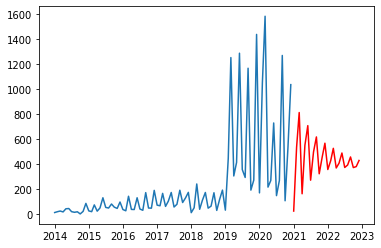

In [176]:
pyplot.plot(dd['sales'])
pyplot.plot(output,color='red')